In [1]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [2]:
dpe = DPE('COM3')
dpe.set_clock(50)
dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


[64, 64]

....

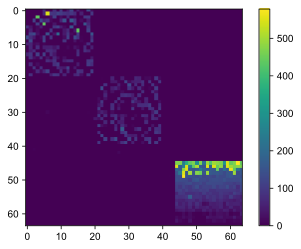

In [3]:
g = dpe.read(0, Tdly=1000)
plt.imshow(g * 1e6)
plt.colorbar()

In [4]:
from scipy.io import loadmat
data_mat = loadmat('data/W_test.mat')

W_test = data_mat['W_test']

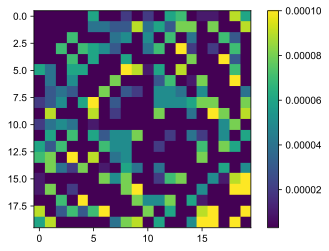

In [5]:
plt.imshow(W_test); plt.colorbar()

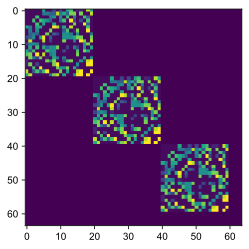

In [29]:
N = 64

Gtarget = np.ones((N,N)) * 0e-6
Gtarget[:W_test.shape[0], :W_test.shape[1]] = W_test
Gtarget[W_test.shape[0]*1:W_test.shape[0]*2, W_test.shape[1]*1:W_test.shape[1]*2 ] = W_test
Gtarget[W_test.shape[0]*2:W_test.shape[0]*3, W_test.shape[1]*2:W_test.shape[1]*3 ] = W_test

Msel = Gtarget > 0

plt.imshow(Gtarget)

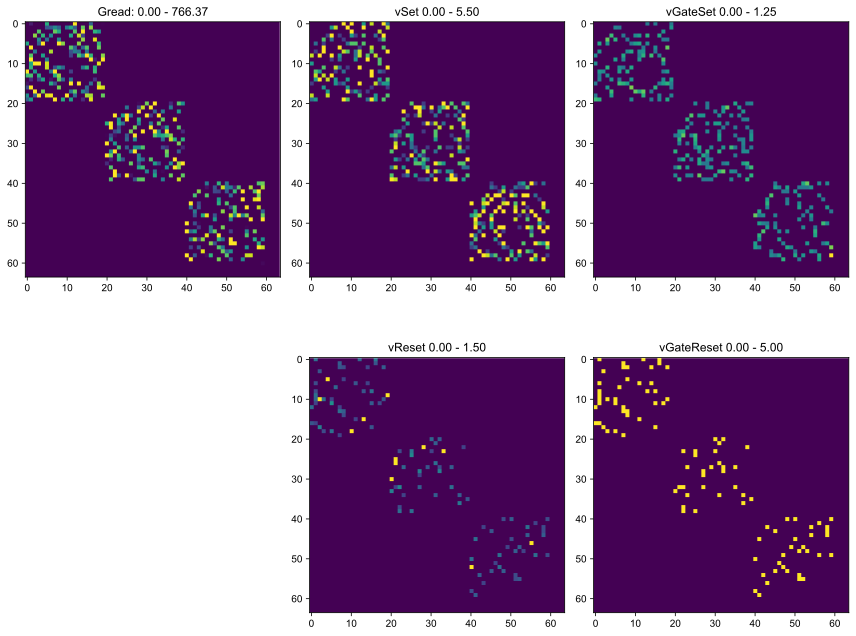

St-art programming, step=199, maxBound=101 yield= 59.83%
Setting 280 devices...
Programming with external timing Twidth=10000.000 us
..Resetting 101 devices...
Programming with external timing Twidth=10000.000 us
.

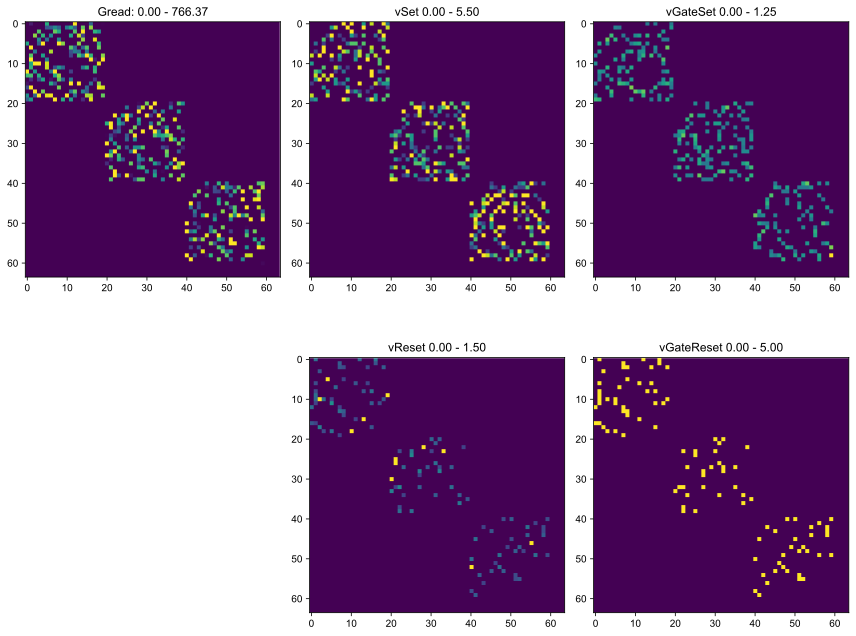

In [32]:
def myplot(data):
    Gread = data['Ghist'][-1]
    vSet = data['vSetHist'][-1]
    vGateSet = data['vGateSetHist'][-1]
    vReset = data['vResetHist'][-1]
    vGateReset = data['vGateResetHist'][-1]
    
    
    plt.figure(1, figsize=(12,10))
    plt.subplot(2,3,1)
    plt.imshow(Gread * 1e6)
    plt.title(f'Gread: {Gread.min()*1e6:.2f} - {Gread.max()*1e6:.2f}')
    plt.clim(0, 100)
    
    plt.subplot(2,3,2)
    plt.imshow(vSet)
    plt.title(f'vSet {vSet.min():.2f} - {vSet.max():.2f}')
    
    plt.subplot(2,3,3)
    plt.imshow(vGateSet )
    plt.title(f'vGateSet {vGateSet.min():.2f} - {vGateSet.max():.2f}')
    
    plt.subplot(2,3,5)
    plt.imshow(vReset)
    plt.title(f'vReset {vReset.min():.2f} - {vReset.max():.2f}')
    
    plt.subplot(2,3,6)
    plt.imshow(vGateReset )
    plt.title(f'vGateReset {vGateReset.min():.2f} - {vGateReset.max():.2f}')
    
    plt.tight_layout()
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

data = dpe.tune_conductance(2,  Gtarget, saveHistory=True, maxSteps=200, method='slow', plot_callback=myplot,
                           vSetRamp=[1, 5.5, 1], Twidth=10e-3, Msel=Msel)

In [22]:
g = dpe.read(2)

....

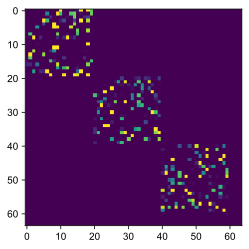

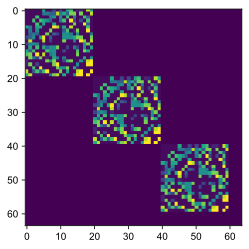

In [24]:
plt.figure(1)
plt.imshow(g)
plt.clim((0, 100e-6))

plt.figure(2)
plt.imshow(Gtarget)

In [33]:
save_workspace(vars(), note='zhan_3rd_write')

Saving In(<class 'list'>), Out(<class 'dict'>), g(<class 'numpy.ndarray'>), x(<class 'dict'>), data_mat(<class 'dict'>), W_test(<class 'numpy.ndarray'>), G_target(<class 'numpy.ndarray'>), Gtarget(<class 'numpy.ndarray'>), N(<class 'int'>), data(<class 'dict'>), Msel(<class 'numpy.ndarray'>), to 20200103-143846-zhan_3rd_write.pkl
Saving In(<class 'list'>), g(<class 'numpy.ndarray'>), W_test(<class 'numpy.ndarray'>), G_target(<class 'numpy.ndarray'>), Gtarget(<class 'numpy.ndarray'>), N(<class 'int'>), Msel(<class 'numpy.ndarray'>), to 20200103-143846-zhan_3rd_write.mat


Text(0, 0.5, 'Reset voltages')

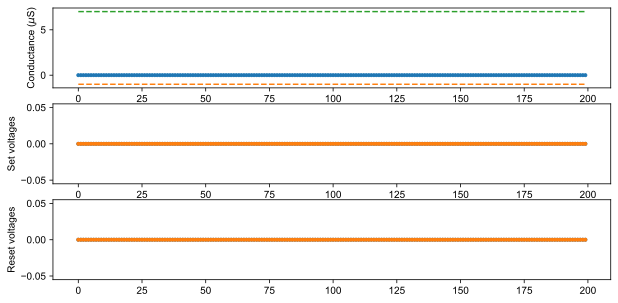

In [42]:
Gtol = 4e-6

vSetHist = np.array(data['vSetHist'])
vGateSetHist = np.array(data['vGateSetHist'])

Ghist = np.array(data['Ghist'])
vResetHist = np.array(data['vResetHist'])
vGateResetHist = np.array(data['vGateResetHist'])


x = 1
y = 0

plt.figure(figsize=(10,5))
plt.subplot(311)
plt.plot(Ghist[:, x, y]*1e6, '.-')
plt.plot([0, len(Ghist[:, x, y])-1], [(Gtarget[x,y]-Gtol)*1e6, (Gtarget[x,y]-Gtol)*1e6], '--')
plt.plot([0, len(Ghist[:, x, y])-1], [(Gtarget[x,y]+Gtol)*1e6, (Gtarget[x,y]+Gtol)*1e6], '--')
plt.ylabel('Conductance ($\mu$S)')

plt.subplot(312)
plt.plot(vSetHist[:, x, y], '.-')
plt.plot(vGateSetHist[:, x, y], '.-')
plt.ylabel('Set voltages')

plt.subplot(313)
plt.plot(vResetHist[:, x, y], '.-')
plt.plot(vGateResetHist[:, x, y], '.-')
plt.ylabel('Reset voltages')

In [62]:
from lib_tune_g import *

0,6
1,6
2,6
3,6
4,6
5,6
6,6
7,6
8,6
9,6
10,6


c:\users\localuser\~\.venvs\py37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


11,6
12,6
13,6
14,6
15,6
16,6
17,6
18,6
19,6


<Figure size 432x288 with 0 Axes>

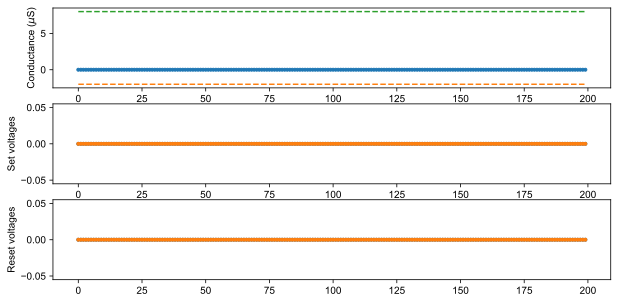

<Figure size 432x288 with 0 Axes>

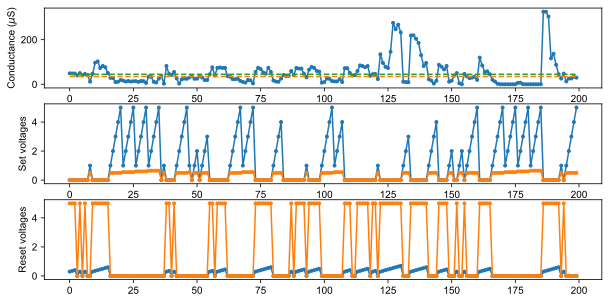

<Figure size 432x288 with 0 Axes>

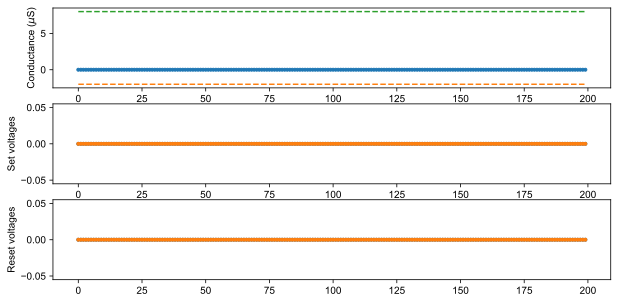

<Figure size 432x288 with 0 Axes>

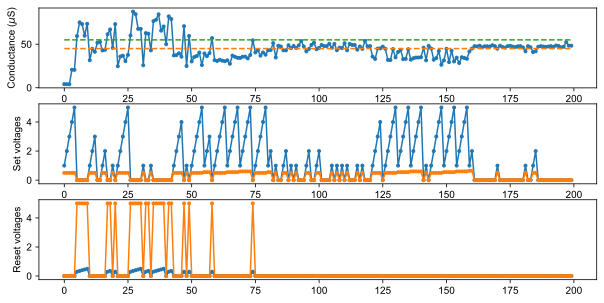

<Figure size 432x288 with 0 Axes>

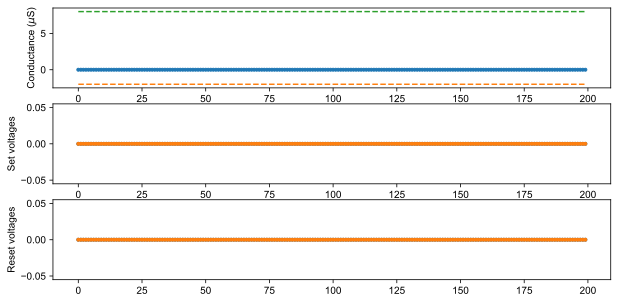

<Figure size 432x288 with 0 Axes>

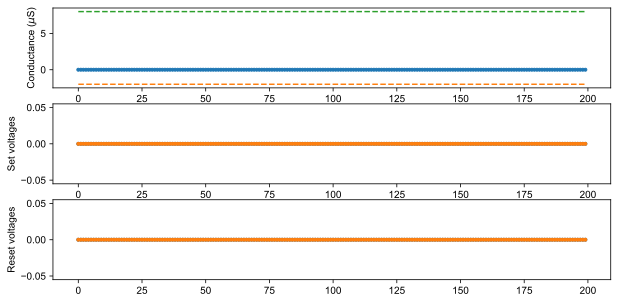

<Figure size 432x288 with 0 Axes>

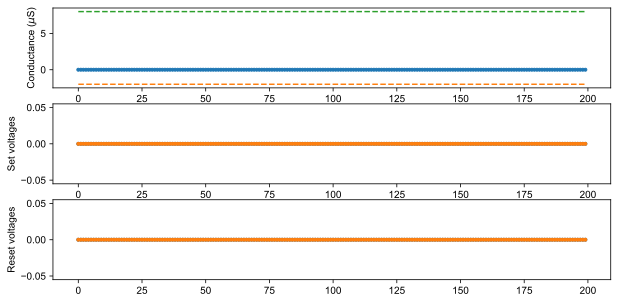

<Figure size 432x288 with 0 Axes>

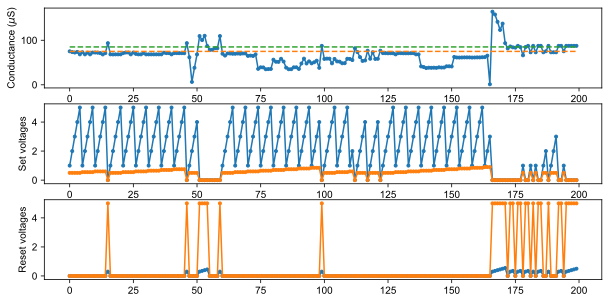

<Figure size 432x288 with 0 Axes>

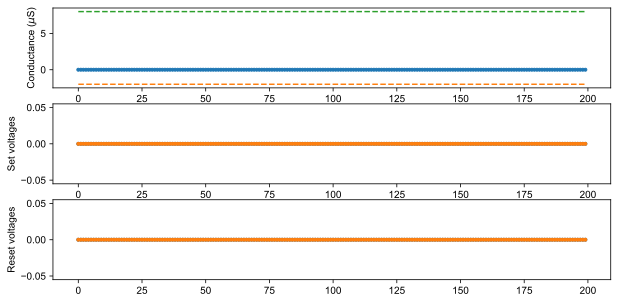

<Figure size 432x288 with 0 Axes>

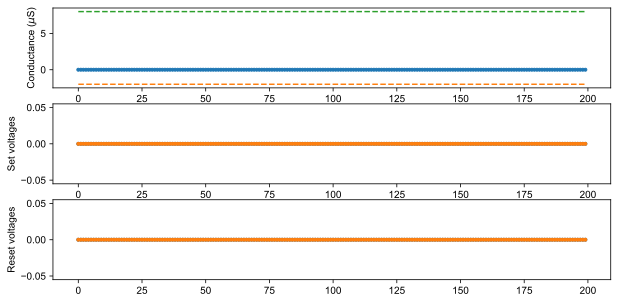

<Figure size 432x288 with 0 Axes>

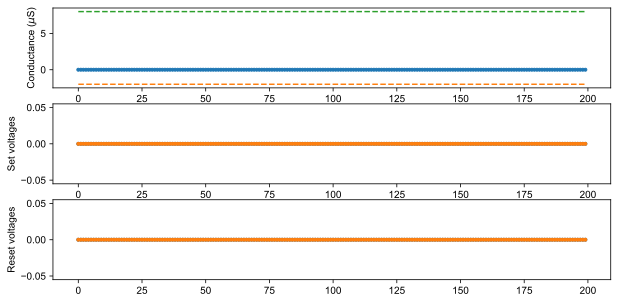

<Figure size 432x288 with 0 Axes>

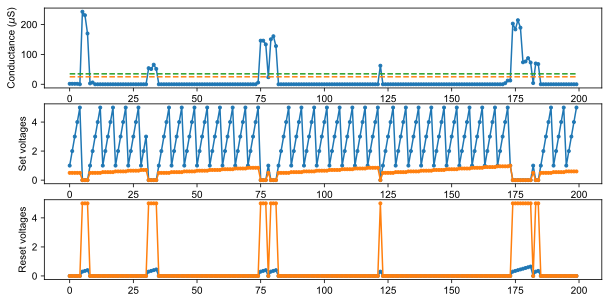

<Figure size 432x288 with 0 Axes>

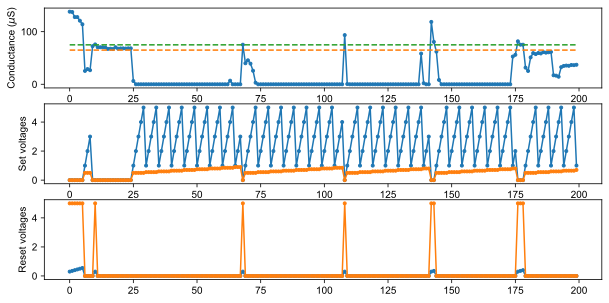

<Figure size 432x288 with 0 Axes>

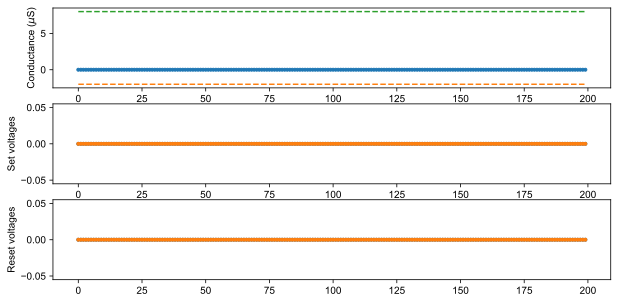

<Figure size 432x288 with 0 Axes>

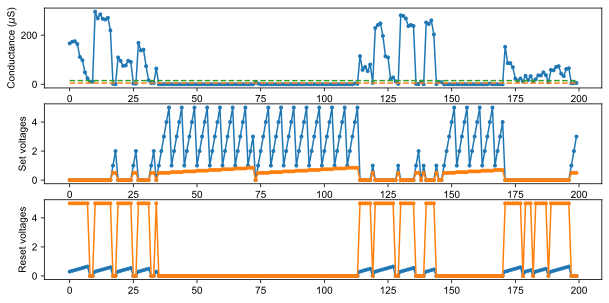

<Figure size 432x288 with 0 Axes>

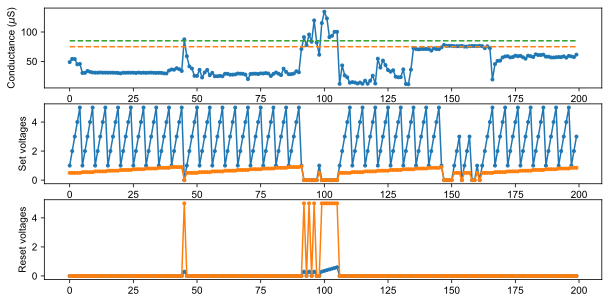

<Figure size 432x288 with 0 Axes>

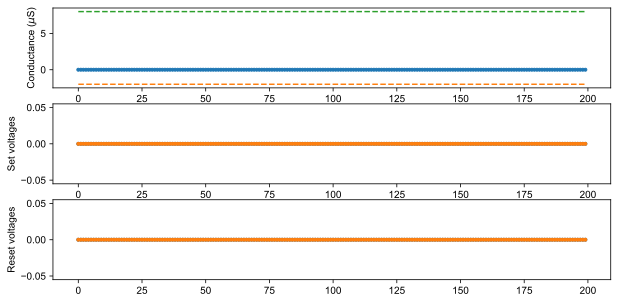

<Figure size 432x288 with 0 Axes>

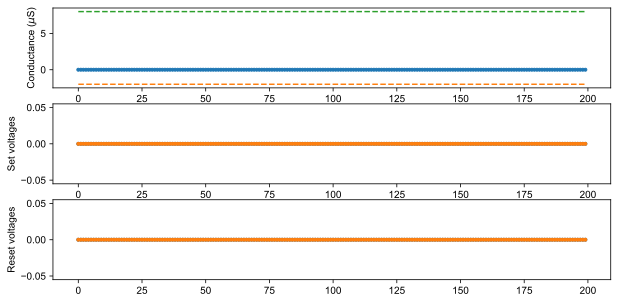

<Figure size 432x288 with 0 Axes>

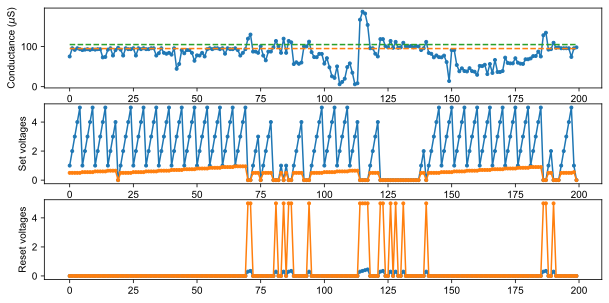

<Figure size 432x288 with 0 Axes>

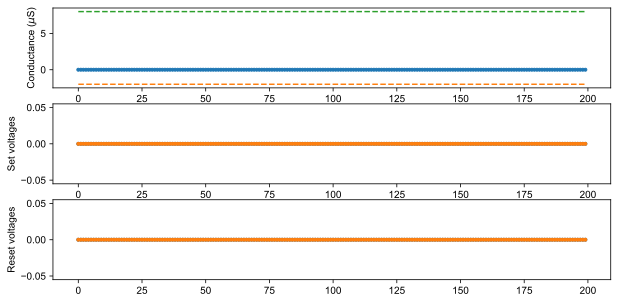

In [53]:
num = 0

for i in range(20):
    for j in range(20):
        if j == 6:
            print(f'{i},{j}')
            plt.figure(num)
            plot_history(i, j, data, Gtarget)
        num += 1

....

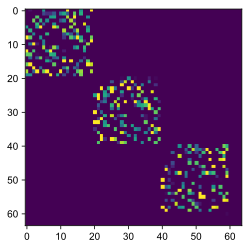

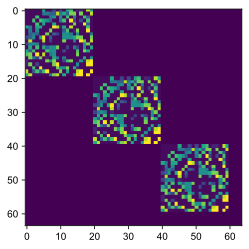

In [52]:
plt.figure(1)
plt.imshow(dpe.read(2))
plt.clim((0, 100e-6))

plt.figure(2)
plt.imshow(Gtarget)
plt.clim((0, 100e-6))

In [75]:
load_workspace(vars(), '20200103-133856-zhan_2nd_write')

Loaded: In, Out, g, x, data_mat, W_test, G_target, Gtarget, N, data, Msel, 


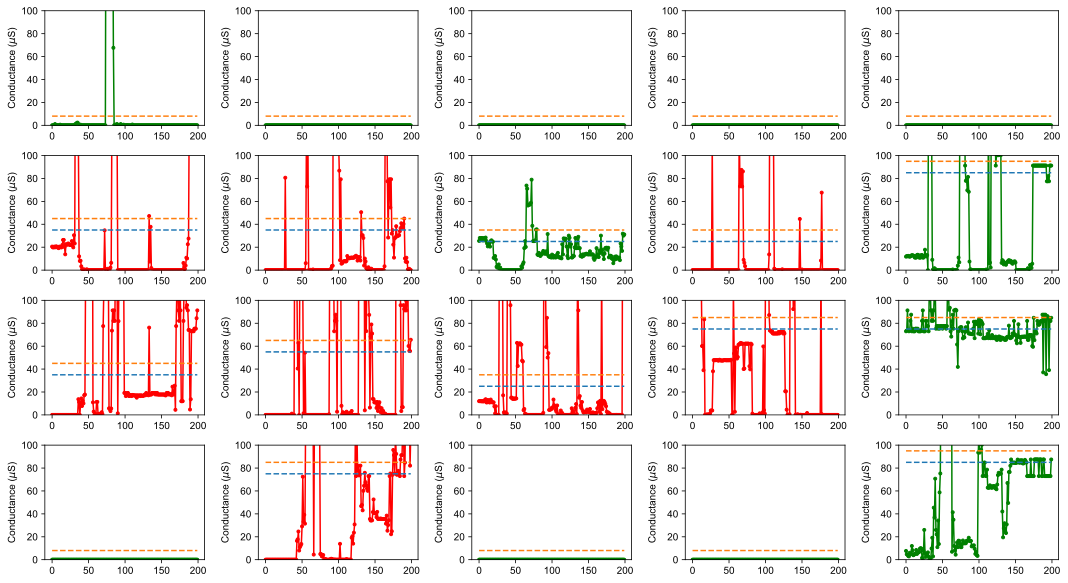

In [76]:
num = 1
plt.figure(figsize=(15,10))

for x in range(20):
    for y in range(20):
        
        if y == 1:
            if num < 25:
                plt.subplot(5,5,num)
                plot_g_history(x, y, data, Gtarget)
                plt.ylim(0, 100)
                num +=1
plt.tight_layout()

Loaded: In, Out, g, x, data_mat, W_test, G_target, Gtarget, N, data, Msel, 


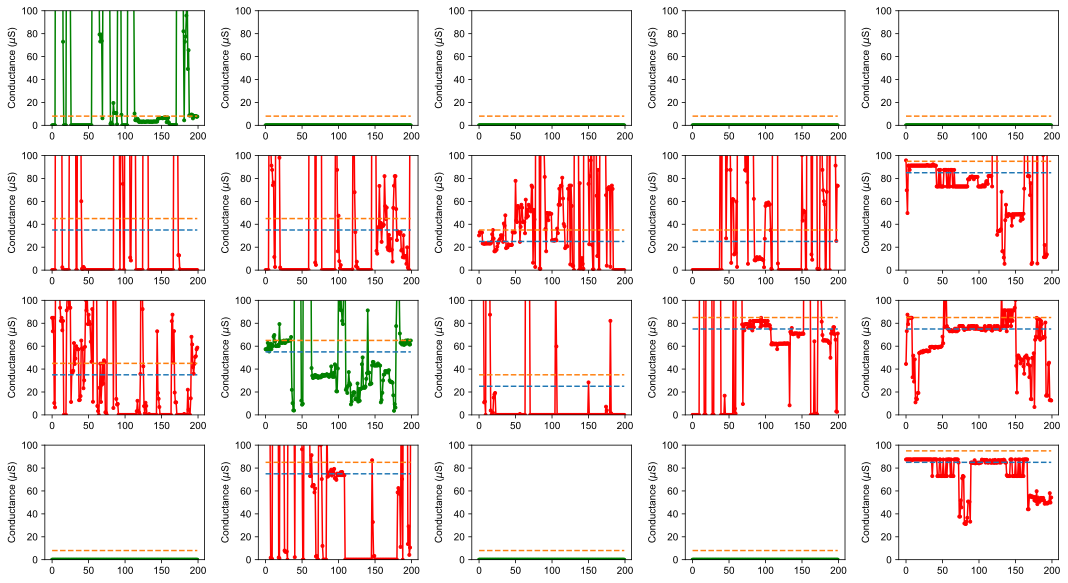

In [77]:
load_workspace(vars(), '20200103-143846-zhan_3rd_write')

num = 1
plt.figure(figsize=(15,10))

for x in range(20):
    for y in range(20):
        
        if y == 1:
            if num < 25:
                plt.subplot(5,5,num)
                plot_g_history(x, y, data, Gtarget)
                plt.ylim(0, 100)
                num +=1
plt.tight_layout()

Loaded: In, Out, g, x, data_mat, W_test, G_target, Gtarget, N, data, 


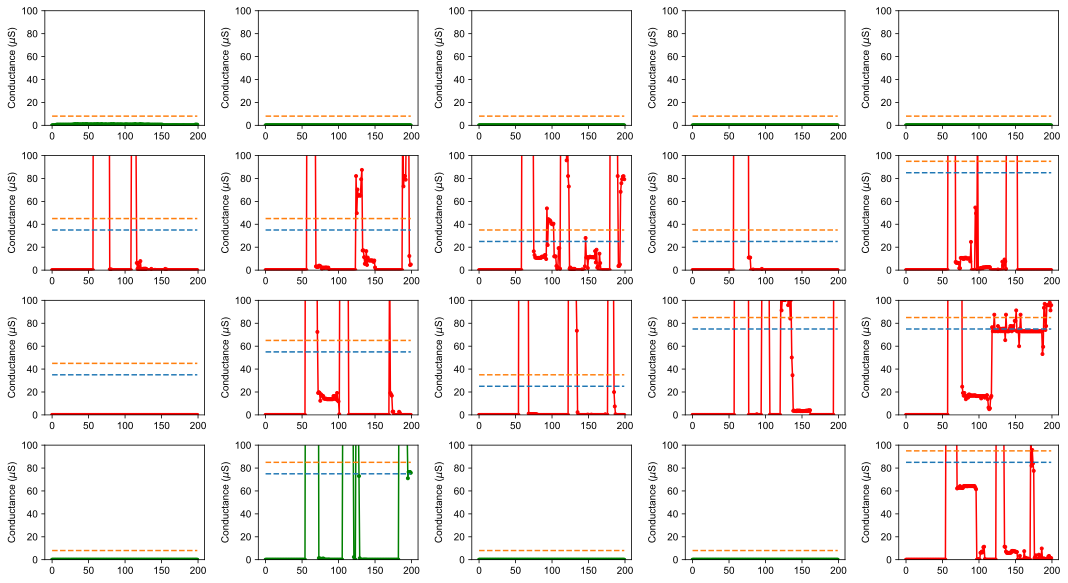

In [78]:
load_workspace(vars(), '20200103-124140-zhan_1st_write')

num = 1
plt.figure(figsize=(15,10))

for x in range(20):
    for y in range(20):
        
        if y == 1:
            if num < 25:
                plt.subplot(5,5,num)
                plot_g_history(x, y, data, Gtarget)
                plt.ylim(0, 100)
                num +=1
plt.tight_layout()

In [ ]:
# reset_single_int(vReset, vGateReset, array=array, row=targetRow, col=targetCol)
# currG = pic_read_single(array, targetRow, targetCol, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
# set_single_int(Vset, Vgate, array=0, row=0, col=0):

In [188]:
row = 0
col = 0
arr = 0

vstop = 4
vstep = 0.1

volts = np.concatenate( (np.arange(0, vstop, vstep), np.arange(vstop, 0, -vstep)) ) 

g_list = []

vGate = 1.2
vRead = 0.2

In [189]:
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0 = dpe.a0
    a0.dut.connect(ser)
    
    for v in volts:
        a0.set_single_int(v, vGate, array=arr, row=row, col=col)
        currG = a0.pic_read_single(arr, row, col, Vread=vRead, Vgate=5, gain=-1) / vRead
        g_list.append(currG)

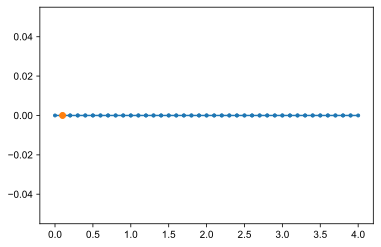

In [190]:
plt.plot(volts, g_list, '.-')
plt.plot(volts[-1], g_list[-1], 'o')

In [97]:
currG

3.421309872922773e-08

....

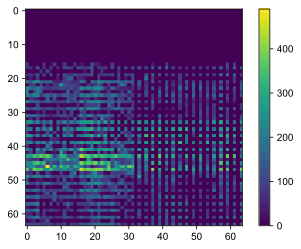

In [143]:
plt.imshow(dpe.read(0, method='slow') * 1e6)
plt.colorbar()

In [197]:
row = 20
col = 0
arr = 0

vstop = 0.2
vstep = 0.002

volts = np.concatenate( (np.arange(0, vstop, vstep), np.arange(vstop, 0, -vstep)) ) 

i_list = []

# vGate = 1.4
vRead = 0.2

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0 = dpe.a0
    a0.dut.connect(ser)
    
    for v in volts:
#         a0.set_single_int(v, vGate, array=arr, row=row, col=col)
        curr = a0.pic_read_single(arr, row, col, Vread=v, Vgate=5, gain=-1) 
        i_list.append(curr)

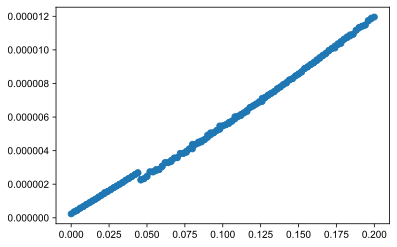

In [198]:
plt.plot(volts, i_list, '-o')

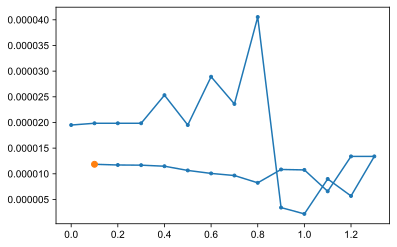

In [155]:
row = 0
col = 0
arr = 0

vstop = 1.3
vstep = 0.1

volts = np.concatenate( (np.arange(0, vstop, vstep), np.arange(vstop, 0, -vstep)) ) 

g_list = []

vGate = 5
vRead = 0.2


with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0 = dpe.a0
    a0.dut.connect(ser)
    
    for v in volts:
        a0.reset_single_int(v, vGate, array=arr, row=row, col=col)
        currG = a0.pic_read_single(arr, row, col, Vread=vRead, Vgate=5, gain=-1) / vRead
        g_list.append(currG)
        
        
plt.plot(volts, g_list, '.-')
plt.plot(volts[-1], g_list[-1], 'o')

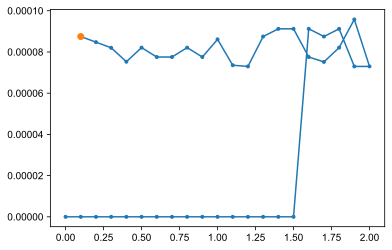

In [203]:
row = 0
col = 0
arr = 0

vstop = 2.0
vstep = 0.1

volts = np.concatenate( (np.arange(0, vstop, vstep), np.arange(vstop, 0, -vstep)) ) 

g_list = []

vGate = 1.2
vRead = 0.2


with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0 = dpe.a0
    a0.dut.connect(ser)
    
    for v in volts:
        a0.set_single_int(v, vGate, array=arr, row=row, col=col)
        currG = a0.pic_read_single(arr, row, col, Vread=vRead, Vgate=5, gain=-1) / vRead
        g_list.append(currG)
        
        
plt.plot(volts, g_list, '.-')
plt.plot(volts[-1], g_list[-1], 'o')

In [158]:
Gtarget = np.ones((64,64)) * 50e-6
Msel = np.ones((64,64))

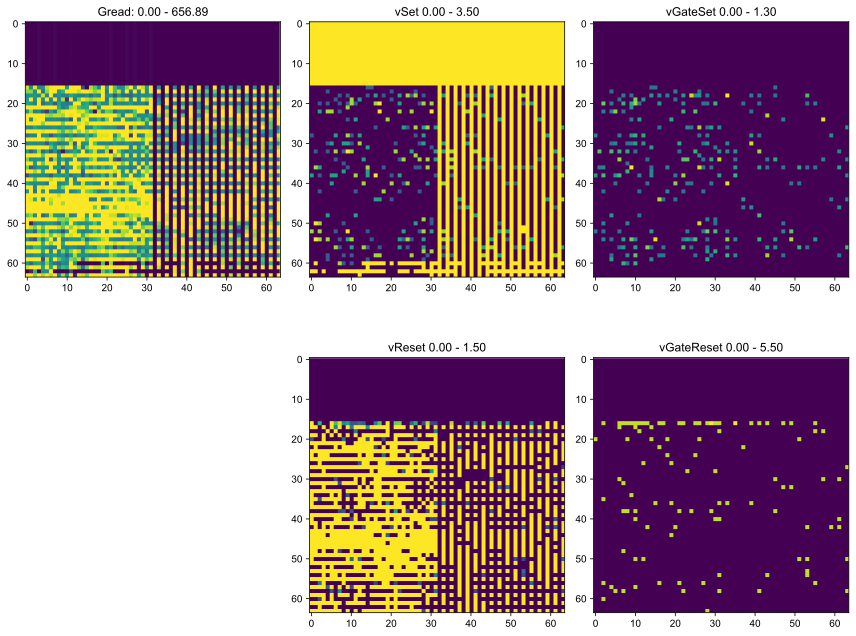

St-art programming, step=199, maxBound=3340 yield= 10.16%
Setting 236 devices...
Programming with internal timing P_RESET=2
Resetting 104 devices...
Programming with internal timing P_RESET=2


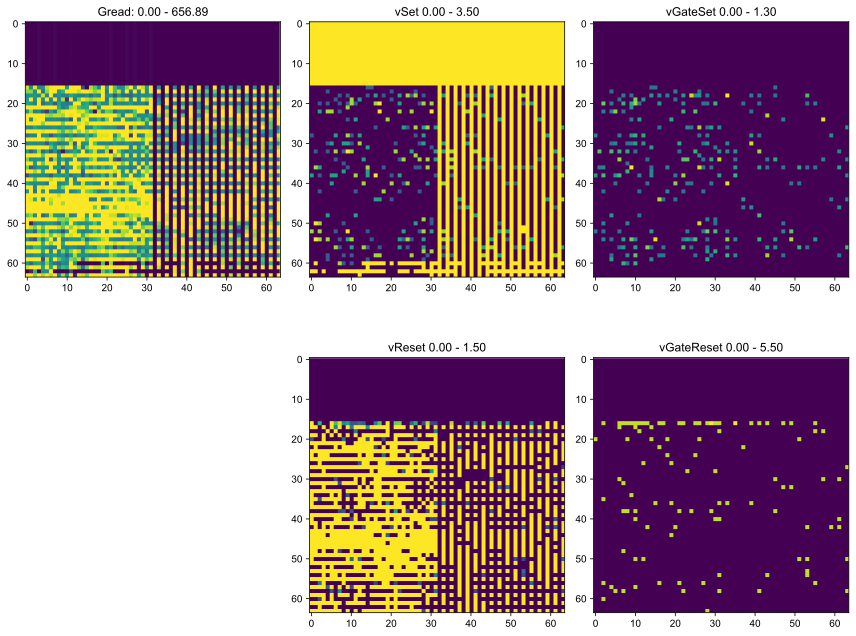

In [159]:
save_workspacelot(data):
    Gread = data['Ghist'][-1]
    vSet = data['vSetHist'][-1]
    vGateSet = data['vGateSetHist'][-1]
    vReset = data['vResetHist'][-1]
    vGateReset = data['vGateResetHist'][-1]
    
    
    plt.figure(1, figsize=(12,10))
    plt.subplot(2,3,1)
    plt.imshow(Gread * 1e6)
    plt.title(f'Gread: {Gread.min()*1e6:.2f} - {Gread.max()*1e6:.2f}')
    plt.clim(0, 100)
    
    plt.subplot(2,3,2)
    plt.imshow(vSet)
    plt.title(f'vSet {vSet.min():.2f} - {vSet.max():.2f}')
    
    plt.subplot(2,3,3)
    plt.imshow(vGateSet )
    plt.title(f'vGateSet {vGateSet.min():.2f} - {vGateSet.max():.2f}')
    
    plt.subplot(2,3,5)
    plt.imshow(vReset)
    plt.title(f'vReset {vReset.min():.2f} - {vReset.max():.2f}')
    
    plt.subplot(2,3,6)
    plt.imshow(vGateReset )
    plt.title(f'vGateReset {vGateReset.min():.2f} - {vGateReset.max():.2f}')
    
    plt.tight_layout()
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

data = dpe.tune_conductance(0,  Gtarget, saveHistory=True, maxSteps=200, method='slow', plot_callback=myplot,
#                            vSetRamp=[1, 5.5, 1],
#                            Twidth=1e-3, 
                            Msel=Msel)

In [160]:
save_workspace(vars(), note='chip-43-array0')

Saving In(<class 'list'>), Out(<class 'dict'>), g(<class 'numpy.ndarray'>), x(<class 'int'>), data_mat(<class 'dict'>), W_test(<class 'numpy.ndarray'>), G_target(<class 'numpy.ndarray'>), Gtarget(<class 'numpy.ndarray'>), N(<class 'int'>), data(<class 'dict'>), Msel(<class 'numpy.ndarray'>), vSetHist(<class 'numpy.ndarray'>), vGateSetHist(<class 'numpy.ndarray'>), Ghist(<class 'numpy.ndarray'>), vResetHist(<class 'numpy.ndarray'>), vGateResetHist(<class 'numpy.ndarray'>), y(<class 'int'>), Gtol(<class 'float'>), num(<class 'int'>), i(<class 'int'>), j(<class 'int'>), histdata(<class 'dict'>), row(<class 'int'>), col(<class 'int'>), vstop(<class 'float'>), vstep(<class 'float'>), volts(<class 'numpy.ndarray'>), v(<class 'numpy.float64'>), arr(<class 'int'>), g_list(<class 'list'>), vGate(<class 'float'>), vRead(<class 'float'>), currG(<class 'float'>), i_list(<class 'list'>), curr(<class 'float'>), to 20200106-150652-chip-43-array0.pkl
Saving In(<class 'list'>), g(<class 'numpy.ndarray'

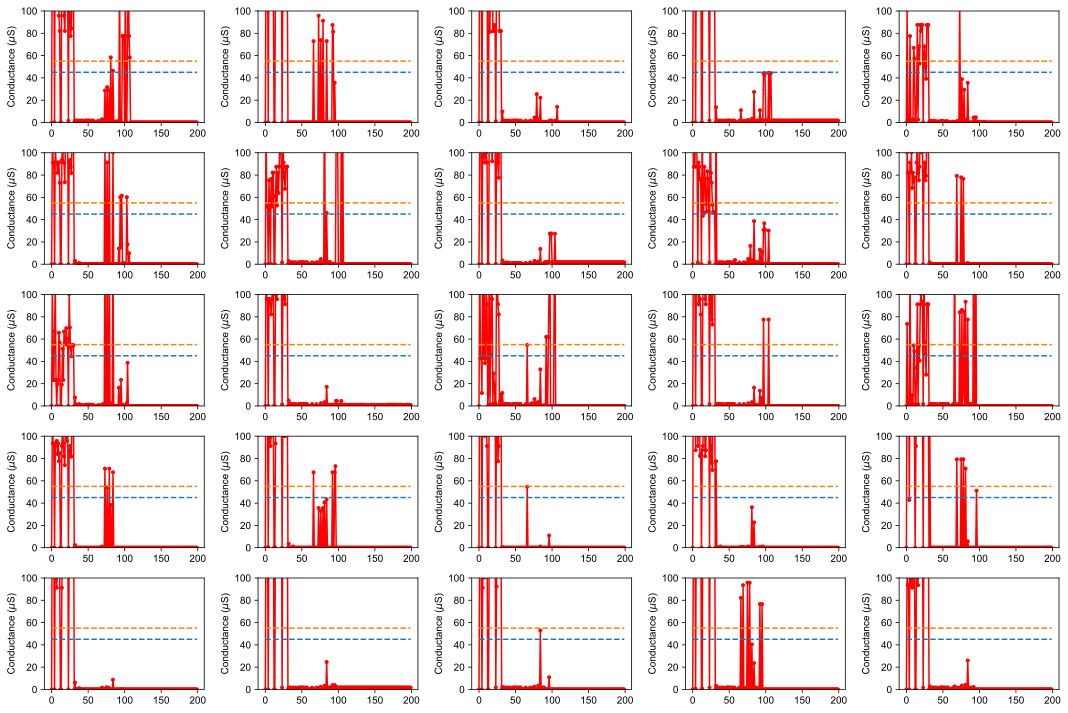

In [171]:
num = 1
plt.figure(figsize=(15,10))

for x in range(40):
    for y in range(40):
        
        if x == 0:
            if num < 26:
                plt.subplot(5,5,num)
                plot_g_history(x, y, data, Gtarget)
                plt.ylim(0, 100)
                num +=1
plt.tight_layout()

....

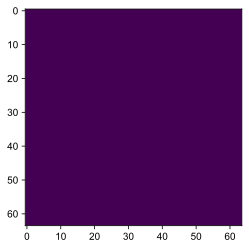

In [175]:
plt.imshow(dpe.read(0))

In [177]:
dpe2 = DPE('COM5')
dpe2.set_clock(50)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


(64, 64)

....

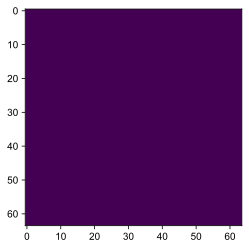

In [178]:
plt.imshow(dpe2.read(0))